In [677]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [678]:
df=pd.read_csv('Algerian_forest_fires_dataset_before_updated.csv',header=1)

In [679]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [680]:
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,12.5,10.4,fire,NaN


In [681]:
print(df.iloc[123])
df.drop([123],inplace=True)


day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 123, dtype: object


In [682]:
print(df.iloc[122])
df.drop([122],inplace=True)

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object


In [683]:
df.iloc[[122,123]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [684]:
df.isnull().any(axis=0)

day            False
month          False
year           False
Temperature    False
 RH            False
 Ws            False
Rain           False
FFMC           False
DMC            False
DC             False
ISI            False
BUI            False
FWI            False
Classes         True
dtype: bool

In [685]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [686]:
df.columns=df.columns.str.strip()
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [687]:

df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
df['Classes'].value_counts()

Classes
fire        137
not fire    107
Name: count, dtype: int64

In [688]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.6+ KB


In [689]:

df['FWI'].iloc[165]=4.7
df.to_csv('algerian_dataset.csv',index=False)

C:\Users\nihal\AppData\Local\Temp\ipykernel_26332\2680583363.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['FWI'].iloc[165]=4.7
C:\Users\nihal\AppData\Local\Temp\ipykernel_26332\2680583363.py:1: SettingWithCopyWarning: 
A value is t

In [690]:
f=['day','month','year','Temperature','RH','Ws']
df[f]=df[f].astype(int)
for i in df.columns:
    if df[i].dtype == 'O' and i != 'Classes':
      df[i]=df[i].astype(float)

In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 38.6+ KB


In [692]:
df['Classes'].value_counts()

Classes
fire        137
not fire    107
Name: count, dtype: int64

In [693]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [694]:
df_copy=df

In [695]:
df=df.drop(['day','month','year'],axis=1)

In [696]:
df['Classes']=np.where(df_copy['Classes']=='not fire',0,1)
df['Classes'].value_counts()

Classes
1    137
0    107
Name: count, dtype: int64

C:\Users\nihal\AppData\Local\Temp\ipykernel_26332\636701970.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


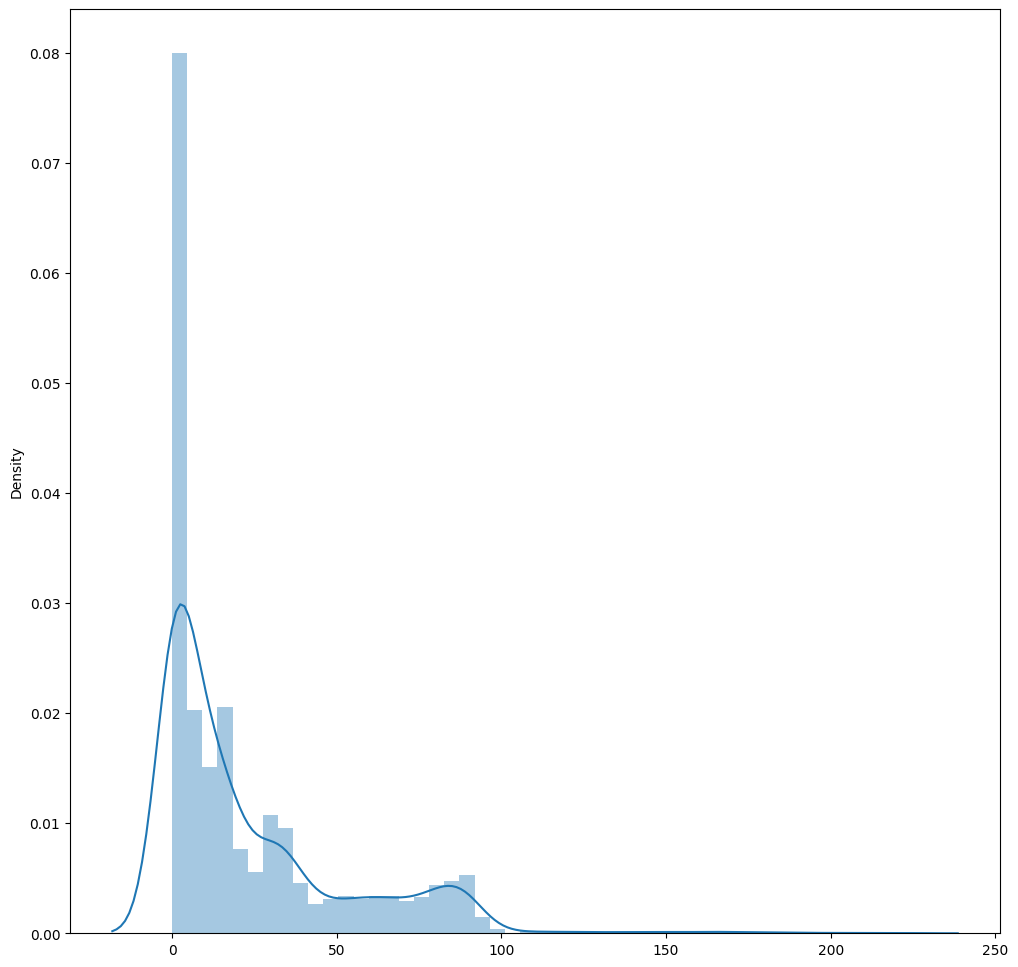

In [697]:
plt.figure(figsize=(12,12))
sns.distplot(df)
plt.show()

([<matplotlib.patches.Wedge at 0x2489b6fb080>,
 [Text(-0.2111255101840992, 1.0795489886751337, 'Fire'),
  Text(0.2111258619457977, -1.0795489198816532, 'No fire')],
 [Text(-0.11515936919132683, 0.5888449029137093, '56.1%'),
  Text(0.11515956106134417, -0.5888448653899926, '43.9%')])

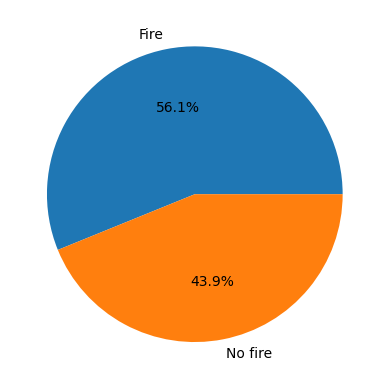

In [698]:
p=df['Classes'].value_counts(normalize=True)*100
c=['Fire','No fire']
plt.pie(p,labels=c,autopct='%1.1f%%')

In [699]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.562766,0.506575,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.575292,-0.420695,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.031159,-0.073810,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.323940,-0.376727,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.689155,0.762942,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875835,0.584757,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.739502,0.512615,-0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.913763,0.719419,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.858025,0.586915,0.087370
FWI,0.562766,-0.575292,0.031159,-0.323940,0.689155,0.875835,0.739502,0.913763,0.858025,1.000000,0.718635,0.195365


<Axes: >

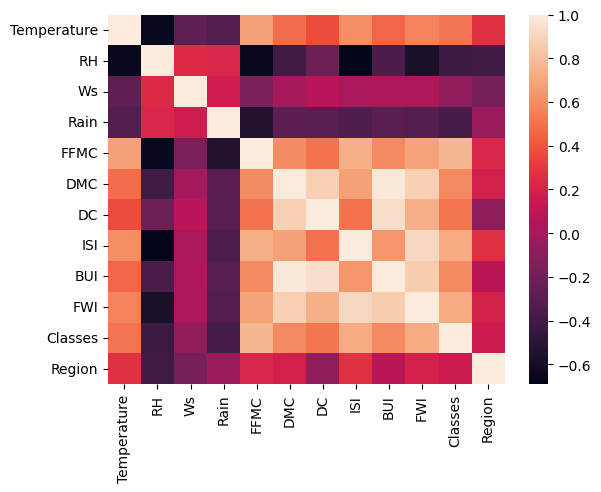

In [700]:
sns.heatmap(df.corr())

In [701]:
df['FWI'].unique

<bound method Series.unique of 0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
241    6.5
242    0.0
243    0.2
244    0.7
245    0.5
Name: FWI, Length: 244, dtype: float64>

<Axes: ylabel='FWI'>

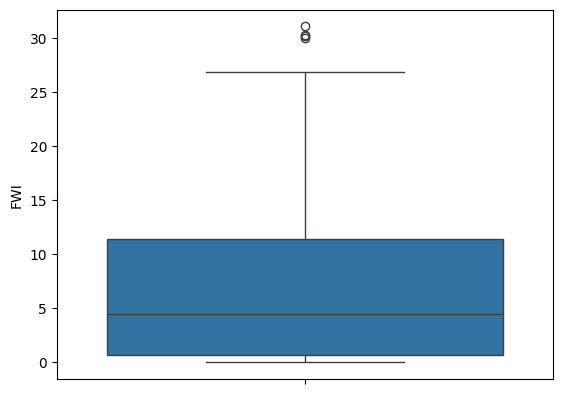

In [702]:
sns.boxplot(df['FWI'])

<Axes: xlabel='month', ylabel='count'>

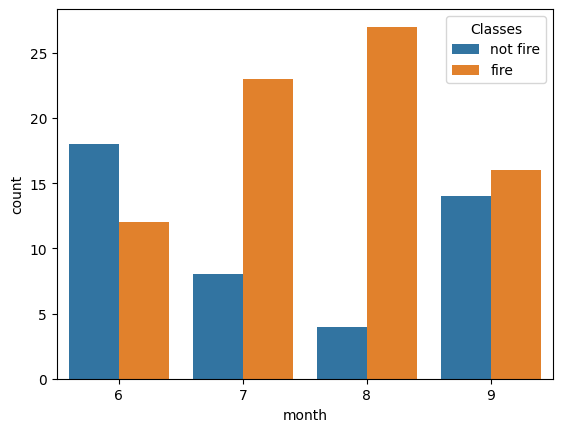

In [703]:
dftemp=df_copy.loc[df_copy['Region']==1]

sns.countplot(x='month',hue='Classes',data=dftemp)

<Axes: xlabel='month', ylabel='count'>

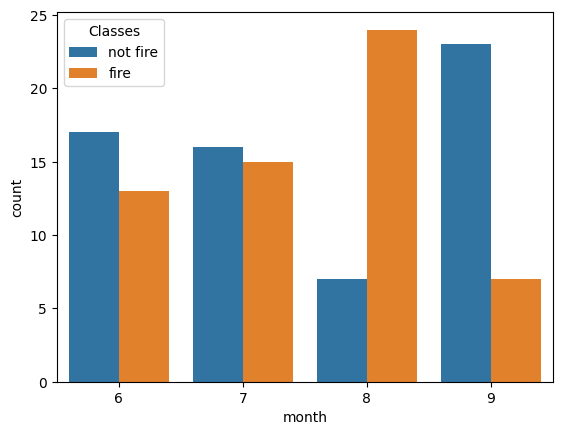

In [704]:
dftemp=df_copy.loc[df_copy['Region']==0]

sns.countplot(x='month',hue='Classes',data=dftemp)

In [705]:
df.head(1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0


In [706]:
df_copy.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
